# MAP EDA for Blog

Sources:
[MAP website](https://www.murderdata.org/)

Import standard packages.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Unzip csv files

In [2]:
from zipfile import ZipFile

In [3]:
cd MAPdata

/Users/ashlidougherty/Documents/Flatiron/dsblog/MAPdata


In [4]:
ls

MAPdefinitionsSHR.pdf  UCR65_20.csv.zip
SHR76_20.csv.zip       unzipped/


## Unified Crime Report

Cannot find the data dictionary for UCR? Will focus on SHR. There are more details and more entries in that report.

***

## Supplementary Homocide Report

In [63]:

# specifying the zip file name
file_name_1 = "./SHR76_20.csv.zip"
# opening the zip file in READ mode
with ZipFile(file_name_1, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
    # extracting all the files
    print('Extracting all the files now...')
    # extract data to the same directory as the other data
    zip.extractall(path='./unzipped')
    print('Done!')

File Name                                             Modified             Size
SHR76_20.csv                                   2022-07-21 20:32:22    303595773
__MACOSX/._SHR76_20.csv                        2022-07-21 20:32:22          777
Extracting all the files now...
Done!


In [64]:
shr = pd.read_csv('./unzipped/SHR76_20.csv', low_memory=False)

In [65]:
shr.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197609001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,No,1976,NaN,...,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,NaN,0,0,30180.0,"Montgomery, AL"
1,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,NaN,0,0,30180.0,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,NaN,0,1,30180.0,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Shotgun,Husband,Other arguments,NaN,0,0,30180.0,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Montgomery, AL"


In [66]:
shr.shape

(827219, 31)

In [67]:
shr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            827219 non-null  object 
 1   CNTYFIPS      827219 non-null  object 
 2   Ori           827219 non-null  object 
 3   State         827219 non-null  object 
 4   Agency        827219 non-null  object 
 5   Agentype      827219 non-null  object 
 6   Source        827219 non-null  object 
 7   Solved        827219 non-null  object 
 8   Year          827219 non-null  int64  
 9   StateName     22468 non-null   object 
 10  Month         827219 non-null  object 
 11  Incident      827219 non-null  int64  
 12  ActionType    827219 non-null  object 
 13  Homicide      827219 non-null  object 
 14  Situation     827219 non-null  object 
 15  VicAge        827219 non-null  int64  
 16  VicSex        827219 non-null  object 
 17  VicRace       827219 non-null  object 
 18  VicE

Running Pandas Profiler

In [15]:
profile = ProfileReport(shr, title="Supp Homocide Report")

In [16]:
profile.to_notebook_iframe()

KeyboardInterrupt: 

First thoughts: 
- Lots of categorical info
- lots of null values

### Cleaning of Data

In [68]:
shr.describe()

,Year,Incident,VicAge,OffAge,VicCount,OffCount,FileDate
count,827219.000000,827219.000000,827219.000000,827219.000000,827219.000000,827219.000000,824709.000000
mean,1996.991040,28.947475,47.540888,352.717006,0.128523,0.185658,52603.878351
std,13.008957,110.180594,118.824307,456.035658,0.564474,0.596206,32519.244970
min,1976.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10181.000000
25%,1986.000000,1.000000,22.000000,24.000000,0.000000,0.000000,30180.000000
50%,1996.000000,2.000000,30.000000,38.000000,0.000000,0.000000,40605.000000
75%,2008.000000,10.000000,42.000000,999.000000,0.000000,0.000000,82306.000000
max,2020.000000,999.000000,999.000000,999.000000,21.000000,40.000000,123197.000000


Mean for offender age seems weird. According to data dictionary: 

OFFAGE – A three-digit numeric variable describing the age in years of the offender. When the offender was not identified at the time of the report, age was reported as 999. A value of 99 represents all offenders 99 or older

In [36]:
shr.OffAge.value_counts()

999    274871
20      26945
19      25187
21      24217
22      23888
        ...  
95         13
98         10
96         10
2           8
97          5
Name: OffAge, Length: 101, dtype: int64

In [69]:
shr = shr[shr.OffAge != 999]

In [70]:
shr.OffAge.value_counts()

20    26945
19    25187
21    24217
22    23888
18    23295
      ...  
95       13
96       10
98       10
2         8
97        5
Name: OffAge, Length: 100, dtype: int64

In [71]:
shr.shape

(552348, 31)

In [72]:
shr.isna().sum()

ID                   0
CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
StateName       537774
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       524895
VicCount             0
OffCount             0
FileDate          2075
MSA                  0
dtype: int64

In [73]:
#will be dropping StateName, redundant info from State column

shr.drop(columns='StateName', inplace = True)

In [74]:
shr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552348 entries, 1 to 827217
Data columns (total 30 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            552348 non-null  object 
 1   CNTYFIPS      552348 non-null  object 
 2   Ori           552348 non-null  object 
 3   State         552348 non-null  object 
 4   Agency        552348 non-null  object 
 5   Agentype      552348 non-null  object 
 6   Source        552348 non-null  object 
 7   Solved        552348 non-null  object 
 8   Year          552348 non-null  int64  
 9   Month         552348 non-null  object 
 10  Incident      552348 non-null  int64  
 11  ActionType    552348 non-null  object 
 12  Homicide      552348 non-null  object 
 13  Situation     552348 non-null  object 
 14  VicAge        552348 non-null  int64  
 15  VicSex        552348 non-null  object 
 16  VicRace       552348 non-null  object 
 17  VicEthnic     552348 non-null  object 
 18  OffA

In [75]:
shr.isna().sum()

ID                   0
CNTYFIPS             0
Ori                  0
State                0
Agency               0
Agentype             0
Source               0
Solved               0
Year                 0
Month                0
Incident             0
ActionType           0
Homicide             0
Situation            0
VicAge               0
VicSex               0
VicRace              0
VicEthnic            0
OffAge               0
OffSex               0
OffRace              0
OffEthnic            0
Weapon               0
Relationship         0
Circumstance         0
Subcircum       524895
VicCount             0
OffCount             0
FileDate          2075
MSA                  0
dtype: int64

In [76]:
#most files do not have a sub circumstance, will drop column instead of null rows
shr.drop(columns='Subcircum', inplace = True)

In [77]:
shr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 552348 entries, 1 to 827217
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            552348 non-null  object 
 1   CNTYFIPS      552348 non-null  object 
 2   Ori           552348 non-null  object 
 3   State         552348 non-null  object 
 4   Agency        552348 non-null  object 
 5   Agentype      552348 non-null  object 
 6   Source        552348 non-null  object 
 7   Solved        552348 non-null  object 
 8   Year          552348 non-null  int64  
 9   Month         552348 non-null  object 
 10  Incident      552348 non-null  int64  
 11  ActionType    552348 non-null  object 
 12  Homicide      552348 non-null  object 
 13  Situation     552348 non-null  object 
 14  VicAge        552348 non-null  int64  
 15  VicSex        552348 non-null  object 
 16  VicRace       552348 non-null  object 
 17  VicEthnic     552348 non-null  object 
 18  OffA

In [78]:
shr.FileDate.value_counts()

30180.0     57427
83121.0     12795
43020.0     10457
93019.0     10423
70618.0      4539
            ...  
102315.0        1
102391.0        1
102606.0        1
71284.0         1
32718.0         1
Name: FileDate, Length: 5488, dtype: int64

In [79]:
#contains year the report was made, year of homocide or recovery is already given so will drop this column too
shr.drop(columns='FileDate', inplace = True)

In [80]:
shr.isna().sum()
# all null values dealt with

ID              0
CNTYFIPS        0
Ori             0
State           0
Agency          0
Agentype        0
Source          0
Solved          0
Year            0
Month           0
Incident        0
ActionType      0
Homicide        0
Situation       0
VicAge          0
VicSex          0
VicRace         0
VicEthnic       0
OffAge          0
OffSex          0
OffRace         0
OffEthnic       0
Weapon          0
Relationship    0
Circumstance    0
VicCount        0
OffCount        0
MSA             0
dtype: int64

In [81]:
shr.head()
# I am only concerned about Dallas Country which is in Texas so i will filter records for only this state

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount,MSA
1,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,January,...,62,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,March,...,52,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,March,...,22,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,August,...,21,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0,"Montgomery, AL"
5,197710001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,October,...,80,Male,Black,Unknown or not reported,Shotgun,Stranger,Robbery,0,0,"Montgomery, AL"


In [150]:
shr.State.value_counts()

California              75842
Texas                   56847
Florida                 32615
New York                29236
Michigan                22496
Illinois                21766
Pennsylvania            20540
North Carolina          19817
Georgia                 19162
Ohio                    18014
Louisiana               16036
Virginia                15829
Tennessee               15616
South Carolina          13982
Missouri                12662
Maryland                11847
Alabama                 11779
New Jersey              11260
Arizona                 10663
Oklahoma                 9521
Indiana                  9411
Washington               7775
Arkansas                 7606
Kentucky                 7433
Mississippi              6887
Colorado                 6874
Wisconsin                6798
Nevada                   4954
Massachusetts            4856
Oregon                   4352
Minnesota                4166
New Mexico               4134
Connecticut              3996
West Virgi

In [309]:
shr_texas = shr[shr.State == 'Texas']

In [310]:
shr_texas.shape

(56847, 28)

In [311]:
shr_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56847 entries, 700892 to 780257
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            56847 non-null  object
 1   CNTYFIPS      56847 non-null  object
 2   Ori           56847 non-null  object
 3   State         56847 non-null  object
 4   Agency        56847 non-null  object
 5   Agentype      56847 non-null  object
 6   Source        56847 non-null  object
 7   Solved        56847 non-null  object
 8   Year          56847 non-null  int64 
 9   Month         56847 non-null  object
 10  Incident      56847 non-null  int64 
 11  ActionType    56847 non-null  object
 12  Homicide      56847 non-null  object
 13  Situation     56847 non-null  object
 14  VicAge        56847 non-null  int64 
 15  VicSex        56847 non-null  object
 16  VicRace       56847 non-null  object
 17  VicEthnic     56847 non-null  object
 18  OffAge        56847 non-null  int64 
 19

In [312]:
#more data cleaning, looking at victim and offender specific data

relvant_columns = ['Solved',
                   'Year',
                   #'Month',
                   'Homicide', 
                   'Situation', 
                   'VicAge', 
                   'VicSex',
                   'VicRace',
                   'VicEthnic', 
                   'OffAge', 
                   'OffSex',
                   'OffRace',
                   'OffEthnic',
                   'Weapon', 
                   'Relationship'
                   ]
shr_texas = shr_texas[relvant_columns]

In [313]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship
700892,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Shotgun,Acquaintance
700893,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Rifle,Husband
700894,Yes,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Rifle,Wife
700895,Yes,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife
700896,Yes,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife


In [314]:
shr_texas.shape

(56847, 14)

In [315]:
shr_texas.Solved.value_counts()

Yes    56718
No       129
Name: Solved, dtype: int64

In [316]:
shr_texas.Solved = shr_texas.Solved.apply(lambda x: 1 if x == 'Yes' else 0)

In [317]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship
700892,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Shotgun,Acquaintance
700893,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Rifle,Husband
700894,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Rifle,Wife
700895,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife
700896,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife


In [318]:
shr_texas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56847 entries, 700892 to 780257
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Solved        56847 non-null  int64 
 1   Year          56847 non-null  int64 
 2   Homicide      56847 non-null  object
 3   Situation     56847 non-null  object
 4   VicAge        56847 non-null  int64 
 5   VicSex        56847 non-null  object
 6   VicRace       56847 non-null  object
 7   VicEthnic     56847 non-null  object
 8   OffAge        56847 non-null  int64 
 9   OffSex        56847 non-null  object
 10  OffRace       56847 non-null  object
 11  OffEthnic     56847 non-null  object
 12  Weapon        56847 non-null  object
 13  Relationship  56847 non-null  object
dtypes: int64(4), object(10)
memory usage: 6.5+ MB


In [319]:
shr_texas.Weapon.value_counts()

Handgun - pistol, revolver, etc         27991
Knife or cutting instrument              9110
Firearm, type not stated                 3926
Shotgun                                  3893
Personal weapons, includes beating       3379
Rifle                                    2997
Blunt object - hammer, club, etc         2170
Other or type unknown                    2029
Strangulation - hanging                   472
Asphyxiation - includes death by gas      303
Fire                                      238
Drowning                                  120
Narcotics or drugs, sleeping pills         88
Other gun                                  73
Poison - does not include gas              32
Explosives                                 15
Pushed or thrown out window                11
Name: Weapon, dtype: int64

In [320]:
shr_texas['Weapon_Type'] = shr_texas.Weapon.map({'Handgun - pistol, revolver, etc':'Firearm',
                                                 'Firearm, type not stated': 'Firearm', 
                                                 'Shotgun': 'Firearm',
                                                 'Rifle': 'Firearm',
                                                 'Other gun': 'Firearm',
                                                 'Knife or cutting instrument': 'Stabbing', 
                                                 'Personal weapons, includes beating': 'Blunt Force Trauma',
                                                 'Blunt object - hammer, club, etc': 'Blunt Force Trauma',
                                                 'Other or type unknown': 'Other', 
                                                 'Strangulation - hanging': 'Strangle or Asphyx',
                                                 'Asphyxiation - includes death by gas':'Strangle or Asphyx',
                                                 'Fire': 'Other', 
                                                 'Drowning': 'Other',
                                                 'Narcotics or drugs, sleeping pills': 'Other',
                                                 'Poison - does not include gas': 'Other',
                                                 'Explosives': 'Other',
                                                 'Pushed or thrown out window': 'Blunt Force Trauma'
                                                })

In [321]:
shr_texas.Weapon_Type.isna().sum()

0

In [244]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Weapon_Type
700892,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Shotgun,Acquaintance,Firearm
700893,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Rifle,Husband,Firearm
700894,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Rifle,Wife,Firearm
700895,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Firearm
700896,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Wife,Firearm


In [322]:
shr_texas.drop('Weapon', axis=1, inplace=True)

In [323]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Relationship,Weapon_Type
700892,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Acquaintance,Firearm
700893,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Husband,Firearm
700894,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Wife,Firearm
700895,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,Wife,Firearm
700896,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,Wife,Firearm


In [324]:
shr_texas.Relationship.value_counts()

Acquaintance                   18034
Stranger                       12126
Relationship not determined     5491
Wife                            3184
Friend                          2316
Other - known to victim         1898
Husband                         1651
Girlfriend                      1546
Other family                    1458
Son                             1170
Neighbor                         902
In-law                           890
Daughter                         852
Brother                          730
Boyfriend                        699
Common-law wife                  688
Father                           594
Common-law husband               590
Mother                           489
Ex-wife                          324
Stepson                          292
Stepfather                       253
Ex-husband                       147
Stepdaughter                     144
Sister                           130
Homosexual relationship          109
Employer                          56
E

In [332]:
shr_texas['VicOff_Relationship'] = shr_texas.Relationship.map({
    'Acquaintance': 'Acquaintance',
    'Friend': 'Acquaintance',
    'Other - known to victim': 'Acquaintance',
    'Neighbor': 'Acquaintance',
    'Employer': 'Acquaintance',
    'Employee': 'Acquaintance',
    'Stranger': 'Stranger',
    'Relationship not determined': 'Unknown',
    'Wife': 'Partner',
    'Husband': 'Partner',
    'Girlfriend': 'Partner',
    'Boyfriend': 'Partner',
    'Common-law wife': 'Partner',
    'Common-law husband': 'Partner',
    'Ex-husband': 'Partner',
    'Homosexual relationship': 'Partner',
    'Ex-wife': 'Partner',
    'Other family': 'Family',
    'In-law': 'Family',
    'Son': 'Family',
    'Daughter': 'Family',
    'Brother': 'Family',
    'Father': 'Family',
    'Mother': 'Family',
    'Stepson': 'Family',
    'Stepfather': 'Family',
    'Stepdaughter': 'Family',
    'Sister': 'Family',
    'Stepmother': 'Family'
                                                })

In [334]:
shr_texas.VicOff_Relationship.value_counts()

Acquaintance    23260
Stranger        12126
Partner          8938
Family           7032
Unknown          5491
Name: VicOff_Relationship, dtype: int64

In [335]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Relationship,Weapon_Type,VicOff_Relationship
700892,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Acquaintance,Firearm,Acquaintance
700893,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Husband,Firearm,Partner
700894,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Wife,Firearm,Partner
700895,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,Wife,Firearm,Partner
700896,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,Wife,Firearm,Partner


In [336]:
shr_texas.drop('Relationship', axis=1, inplace=True)

In [337]:
shr_texas.head()

,Solved,Year,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon_Type,VicOff_Relationship
700892,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,27,Male,Black,Unknown or not reported,26,Male,Black,Unknown or not reported,Firearm,Acquaintance
700893,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,24,Male,Black,Unknown or not reported,22,Female,Black,Unknown or not reported,Firearm,Partner
700894,1,1976,Murder and non-negligent manslaughter,Single victim/single offender,20,Female,White,Unknown or not reported,20,Male,White,Unknown or not reported,Firearm,Partner
700895,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,43,Female,Black,Unknown or not reported,34,Male,Black,Unknown or not reported,Firearm,Partner
700896,1,1977,Murder and non-negligent manslaughter,Single victim/single offender,24,Female,White,Unknown or not reported,32,Male,White,Unknown or not reported,Firearm,Partner


In [338]:
shr_texas.VicOff_Relationship.value_counts(normalize=True)

Acquaintance    0.409168
Stranger        0.213309
Partner         0.157229
Family          0.123700
Unknown         0.096593
Name: VicOff_Relationship, dtype: float64

<AxesSubplot:ylabel='VicOff_Relationship'>

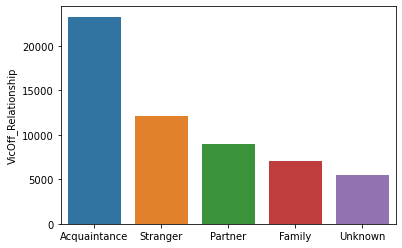

In [339]:
sns.barplot(x = shr_texas.VicOff_Relationship.value_counts().index, y =shr_texas.VicOff_Relationship.value_counts())

In [340]:
shr_texas.Weapon_Type.value_counts(normalize=True)

Firearm               0.683941
Stabbing              0.160255
Blunt Force Trauma    0.097806
Other                 0.044365
Strangle or Asphyx    0.013633
Name: Weapon_Type, dtype: float64

<AxesSubplot:ylabel='Weapon_Type'>

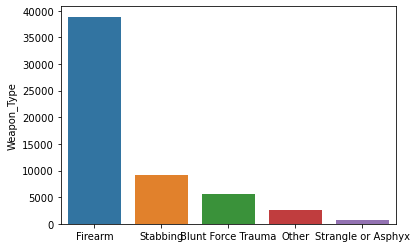

In [341]:
sns.barplot(x = shr_texas.Weapon_Type.value_counts().index, y =shr_texas.Weapon_Type.value_counts())

<AxesSubplot:ylabel='VicSex'>

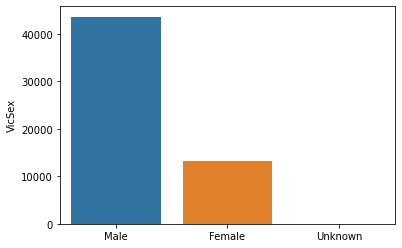

In [342]:
sns.barplot(x = shr_texas.VicSex.value_counts().index, y =shr_texas.VicSex.value_counts())

<AxesSubplot:ylabel='OffSex'>

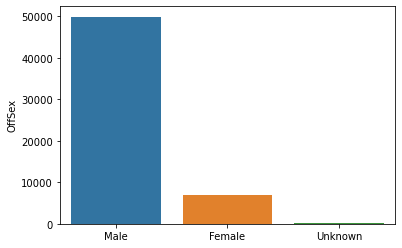

In [343]:
sns.barplot(x = shr_texas.OffSex.value_counts().index, y =shr_texas.OffSex.value_counts())

In [344]:
shr_texas.VicRace.value_counts(normalize=True)

White                                  0.645980
Black                                  0.339473
Asian                                  0.010942
Unknown                                0.002304
American Indian or Alaskan Native      0.001126
Native Hawaiian or Pacific Islander    0.000176
Name: VicRace, dtype: float64

<AxesSubplot:ylabel='VicRace'>

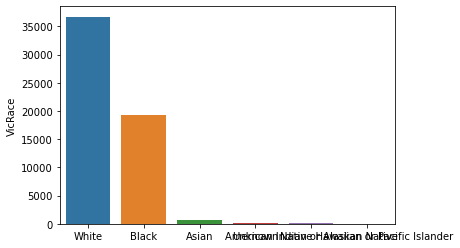

In [345]:
sns.barplot(x = shr_texas.VicRace.value_counts().index, y =shr_texas.VicRace.value_counts())

In [346]:
shr_texas.OffRace.value_counts(normalize=True)

White                                  0.616866
Black                                  0.368463
Asian                                  0.009200
Unknown                                0.004222
American Indian or Alaskan Native      0.000932
Native Hawaiian or Pacific Islander    0.000317
Name: OffRace, dtype: float64

In [347]:
shr_texas.isna().sum()

Solved                 0
Year                   0
Homicide               0
Situation              0
VicAge                 0
VicSex                 0
VicRace                0
VicEthnic              0
OffAge                 0
OffSex                 0
OffRace                0
OffEthnic              0
Weapon_Type            0
VicOff_Relationship    0
dtype: int64

## Data is Cleaned? model building next

### Preprocessing 

In [374]:
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, log_loss
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyRegressor


In [349]:
X = shr_texas.drop('Solved', axis =1)
y = shr_texas['Solved']

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [351]:
objectcols = X_train.select_dtypes(include=object).columns

In [352]:
objectcolslist = [x for x in objectcols]
objectcolslist


['Homicide',
 'Situation',
 'VicSex',
 'VicRace',
 'VicEthnic',
 'OffSex',
 'OffRace',
 'OffEthnic',
 'Weapon_Type',
 'VicOff_Relationship']

In [353]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [354]:
X_train_ohe = ohe.fit_transform(X_train[objectcolslist]).todense()

In [355]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns= ohe.get_feature_names())

In [356]:
X_train_ohe_df

,x0_Manslaughter by negligence,x0_Murder and non-negligent manslaughter,x1_Multiple victims/multiple offenders,x1_Multiple victims/single offender,x1_Single victim/multiple offenders,x1_Single victim/single offender,x2_Female,x2_Male,x2_Unknown,x3_American Indian or Alaskan Native,...,x8_Blunt Force Trauma,x8_Firearm,x8_Other,x8_Stabbing,x8_Strangle or Asphyx,x9_Acquaintance,x9_Family,x9_Partner,x9_Stranger,x9_Unknown
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42630,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
42631,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42632,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
42633,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [358]:
X_test_ohe = pd.DataFrame(ohe.transform(X_test[objectcolslist]).todense(), columns=ohe.get_feature_names())

In [359]:
ss = StandardScaler()

In [360]:
numcollist = [x for x in X_train.select_dtypes(exclude=object).columns]

In [361]:
numcollist

['Year', 'VicAge', 'OffAge']

In [362]:
X_train_sc = pd.DataFrame(ss.fit_transform(X_train[numcollist]), columns = numcollist)

In [363]:
X_test_sc = pd.DataFrame(ss.transform(X_test[numcollist]), columns = numcollist)

In [364]:
X_train_combined =pd.concat([X_train_ohe_df,X_train_sc], axis=1)

In [369]:
X_test_combined = pd.concat([X_test_ohe, X_test_sc], axis =1)

In [366]:
X_test_combined = pd.concat([X_test_ohe, X_test_sc], axis =1)

In [370]:
X_test_combined

,x0_Manslaughter by negligence,x0_Murder and non-negligent manslaughter,x1_Multiple victims/multiple offenders,x1_Multiple victims/single offender,x1_Single victim/multiple offenders,x1_Single victim/single offender,x2_Female,x2_Male,x2_Unknown,x3_American Indian or Alaskan Native,...,x8_Stabbing,x8_Strangle or Asphyx,x9_Acquaintance,x9_Family,x9_Partner,x9_Stranger,x9_Unknown,Year,VicAge,OffAge
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.740258,0.072941,-0.482667
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.603046,-0.099569,-1.025620
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.754674,0.081566,0.680803
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.761609,0.228199,1.456449
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.223975,-0.004689,1.378885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.064865,-0.168573,0.448109
14208,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.685795,-0.030565,1.611579
14209,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.292308,-0.099569,2.387225
14210,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.740258,-0.228952,-0.327538


In [371]:
dum = DummyRegressor()

In [372]:
dum.fit(X_train_combined, y_train)

DummyRegressor()

In [373]:
dum.score(X_test_combined, y_test)

-0.00010910798338259475

In [375]:
logreg = LogisticRegression(random_state=42)

In [376]:
logreg.fit(X_train_combined, y_train)

LogisticRegression(random_state=42)

In [377]:
logreg.score(X_test_combined, y_test)

0.9999296369265409

In [379]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

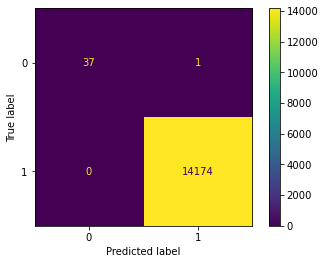

In [383]:
plot_confusion_matrix(logreg, X_test_combined, y_test);